## 5. Modern Portfolio Theory.

### 5.1 Calculate mean and standard deviation of daily returns and annualise them.

In [1]:
# Importing libraries and loading data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Castrol_df = pd.read_csv("D:/Datasets/CASTROLIND.csv")
Castrol_df['Date'] = Castrol_df['Date'].astype('datetime64')
Castrol_df.set_index('Date',inplace=True)
Castrol_df.head()


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,CASTROLIND,EQ,437.70,438.00,452.00,435.50,449.75,449.85,445.95,2018406,9.001031e+08,29885,1637034,81.11
2017-05-16,CASTROLIND,EQ,449.85,451.90,452.00,442.25,443.80,443.00,443.78,534824,2.373424e+08,9438,387126,72.38
2017-05-17,CASTROLIND,EQ,443.00,443.60,444.50,438.35,439.00,439.55,440.69,377225,1.662384e+08,12293,223768,59.32
2017-05-18,CASTROLIND,EQ,439.55,437.95,440.00,432.25,434.20,433.95,435.10,398719,1.734823e+08,7171,211541,53.06
2017-05-19,CASTROLIND,EQ,433.95,436.65,446.85,434.00,438.50,437.10,439.51,886466,3.896110e+08,14752,354918,40.04


In [2]:
# Calculating mean and volatility of daily returns.
daily_returns = Castrol_df['Close Price'].pct_change()
daily_mean = daily_returns.mean()
daily_std = daily_returns.std()
print("Mean daily returns:",daily_mean)
print("Daily standard deviation of returns:",daily_std)

Mean daily returns: -0.001749960698960315
Daily standard deviation of returns: 0.02810189398897723


In [3]:
# Calculating mean ang voatality of annual returns.
annual_mean = daily_mean * 252
annual_std =  daily_std * np.sqrt(252)
print("Mean of annual returns:",annual_mean)
print("Volatility of annual returns:",annual_std)

Mean of annual returns: -0.4409900961379994
Volatility of annual returns: 0.44610373718840785


### 5.2 Building own portfolio with 5 stocks.

In [4]:
# Loading data from 5 different stocks.
Cipla_df = pd.read_csv("D:/Datasets/Large_Cap/CIPLA.csv")
infy_df = pd.read_csv("D:/Datasets/Large_Cap/INFY.csv")
pvr_df = pd.read_csv("D:/Datasets/Small_Cap/PVR.csv")
ncc_df = pd.read_csv("D:/Datasets/Small_Cap/NCC.csv")
pnb_df = pd.read_csv("D:/Datasets/PNB.csv")

In [5]:
# Building portfolio.
portfolio_df = pd.DataFrame()
portfolio_df['CIPLA'] = Cipla_df['Close Price']
portfolio_df['INFY'] = infy_df['Close Price'] 
portfolio_df['PVR'] = pvr_df['Close Price']
portfolio_df['NCC'] = ncc_df['Close Price']
portfolio_df['PNB'] = pnb_df['Close Price']
portfolio_df.index = Cipla_df['Date'].astype('datetime64')
portfolio_df.head()

,CIPLA,INFY,PVR,NCC,PNB
Date,,,,,
2017-05-15,569.00,951.55,1524.95,97.35,166.80
2017-05-16,565.60,955.00,1539.00,100.40,174.15
2017-05-17,562.35,952.80,1530.30,101.45,165.05
2017-05-18,560.10,961.75,1515.05,97.00,158.50
2017-05-19,564.95,957.95,1513.55,95.45,155.20


In [6]:
# Creating weights.
w = np.asarray([0.20]*5)
w

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [7]:
# Calculating covariances.
cov_df = portfolio_df.pct_change().cov()
cov_df

,CIPLA,INFY,PVR,NCC,PNB
CIPLA,0.000256,0.000026,0.000033,0.000012,0.000091
INFY,0.000026,0.000694,0.000002,-0.000003,0.000071
PVR,0.000033,0.000002,0.000380,0.000004,0.000030
NCC,0.000012,-0.000003,0.000004,0.000776,-0.000016
PNB,0.000091,0.000071,0.000030,-0.000016,0.001176


In [8]:
# Calculating the mean returns of the portfolio.
mean_returns = portfolio_df.pct_change().mean()
print("The mean returns of the portfolio are:")
mean_returns

The mean returns of the portfolio are:


CIPLA    0.000047
INFY    -0.000093
PVR      0.000439
NCC      0.000357
PNB     -0.000946
dtype: float64

In [9]:
# Assigning weightage to stocks.
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
# Calculating the annual returns of the portfolio.
annual_returns = np.sum(mean_returns*weights) * 252
print("Annual returns of portfolio:",annual_returns)

Annual returns of portfolio: -0.009934533817018351


In [11]:
# Calculating Annual volatality.
annual_vol = np.sqrt(np.dot(weights.T,np.dot(weights,cov_df))) * np.sqrt(252)
print("Annual volatality of portfolio:",annual_vol)

Annual volatality of portfolio: 0.19521645672739257


### 5.3 Scatter plot for different weights of individual stocks in the portfolio.

In [12]:
num_portfolios = 25000

In [13]:
# Let's define 2 functions, one for random portfolio generation and another is for calculating the annual mean returns and volatality.
def annual_performance_calc(weights, mean_returns, cov_df):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_df, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_df):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(5)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = annual_performance_calc(weights, mean_returns, cov_df)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = portfolio_return / portfolio_std_dev
    return results, weights_record

In [14]:
def display_random_portfolio(mean_returns, cov_df, num_portfolios):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_df)
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o')
    plt.colorbar()
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')

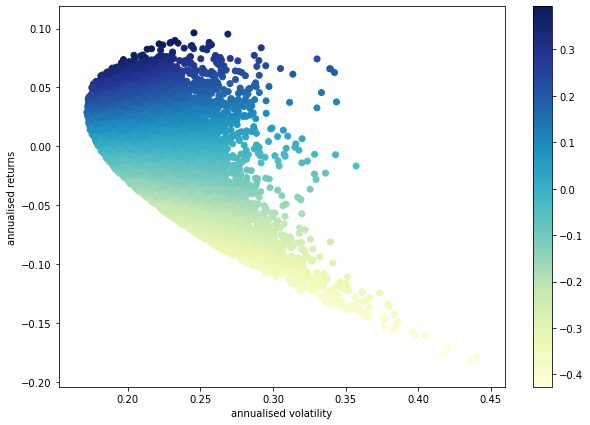

In [15]:
display_random_portfolio(mean_returns, cov_df, num_portfolios)

### 5.4 Marking the two portfolios where the sharpe ratio is high and the volatality is low. 

In [16]:
def marking_portfolio(mean_returns, cov_df, num_portfolios):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_df)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o')
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend()

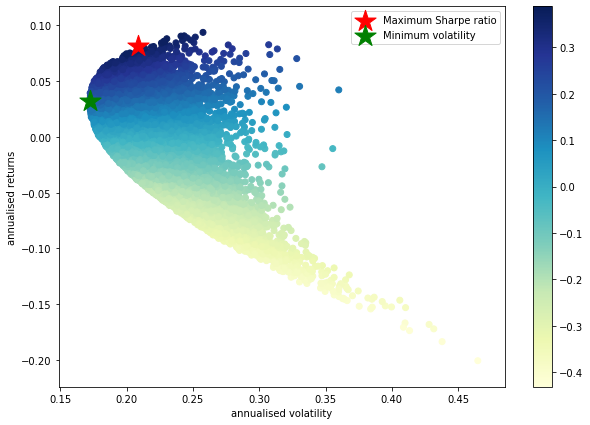

In [17]:
marking_portfolio(mean_returns, cov_df, num_portfolios)